https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook

In [ ]:

from google.colab import drive
drive.mount("/LDA")


Mounted at /LDA


In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet


In [ ]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))


In [ ]:

# df=pd.read_csv("/LDA/MyDrive/NLP/Topic Modeling/abcnews-date-text.csv")
# df


In [ ]:
df=pd.read_excel("/LDA/MyDrive/NLP/Topic Modeling/Restuarants Reviews Final.xlsx")
df


,City Name,Restaurant Name,Review,Stay,Room,Service,Food,Decoration,Bathroom,Pool,WiFi,Parking,Recommendation,Ratings
0,Dhaka,"InterContinental Dhaka, an IHG Hotel",I had an amazing experience here in my short s...,yes,5,5,5,5,5,5,5,5,yes,5
1,Dhaka,"InterContinental Dhaka, an IHG Hotel",I was 100 satisfied with the stay at intercont...,yes,5,5,5,5,5,5,5,5,yes,5
2,Dhaka,"InterContinental Dhaka, an IHG Hotel",All of the facilities are modern & updated her...,yes,5,5,5,5,5,5,5,5,yes,5
3,Dhaka,"InterContinental Dhaka, an IHG Hotel",I have been impressed by the excellent hospita...,yes,5,5,5,5,5,5,5,5,yes,5
4,Dhaka,"InterContinental Dhaka, an IHG Hotel","Featuring 226 luxury rooms and suites, a selec...",yes,5,4,4,5,5,5,5,5,yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Sonargaon,Sonargaon Royal Resort,Has enough place for small conference (100) or...,yes,4,4,4,4,4,4,4,4,yes,4
996,Sonargaon,Sonargaon Royal Resort,Excellent arrangement of high standard residen...,yes,5,5,5,5,5,5,5,5,yes,5
997,Sonargaon,Sonargaon Royal Resort,Nice & lovely resort in Sonargaon Upzilla. Peo...,no,5,5,5,5,5,5,5,5,yes,5
998,Sonargaon,Sonargaon Royal Resort,parking facilities inside the property. Kids z...,no,3,3,3,3,3,3,3,3,no,3


In [ ]:

#https://stackoverflow.com/questions/42422509/python-using-pandas-to-convert-xlsx-to-csv-file-how-to-delete-index-column
df.to_csv('csvfile.csv', encoding='utf-8', index=False)


In [ ]:
df=pd.read_csv("/content/csvfile.csv")

In [ ]:
df.head()

,Review
0,I had an amazing experience here in my short s...
1,I was 100 satisfied with the stay at intercont...
2,All of the facilities are modern & updated her...
3,I have been impressed by the excellent hospita...
4,"Featuring 226 luxury rooms and suites, a selec..."


In [ ]:
#https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df.rename(columns={'Review': 'headline_text'}, inplace=True)

In [ ]:
df.head(7)

,headline_text
0,I had an amazing experience here in my short s...
1,I was 100 satisfied with the stay at intercont...
2,All of the facilities are modern & updated her...
3,I have been impressed by the excellent hospita...
4,"Featuring 226 luxury rooms and suites, a selec..."
5,Overall the stay was comfortable and pleasant....
6,"Good service, good options including happy hou..."


In [ ]:
# # drop the publish date.
# df.drop(['publish_date'],axis=1,inplace=True)
# df.head(7)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
5,ambitious olsson wins triple jump
6,antic delighted with record breaking barca


**DATA CLEANING & PRE-PROCESSING**

Here I have done the data pre-processing. I have used the lemmatizer and can also use the stemmer. Also the stop words have been used along with the words wit lenght shorter than 3 characters to reduce some stray words.

In [ ]:

def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text
  

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:

# time taking
df['headline_cleaned_text']=df['headline_text'].apply(clean_text)


In [ ]:
df.head(7)

,headline_text,headline_cleaned_text
0,I had an amazing experience here in my short s...,amazing experience short stay room comfortable...
1,I was 100 satisfied with the stay at intercont...,satisfied stay intercontinental Dhaka From fir...
2,All of the facilities are modern & updated her...,facility modern updated There place arrange ki...
3,I have been impressed by the excellent hospita...,impressed excellent hospitality business servi...
4,"Featuring 226 luxury rooms and suites, a selec...",Featuring luxury room suite selection restaura...
5,Overall the stay was comfortable and pleasant....,Overall stay comfortable pleasant would repeat...
6,"Good service, good options including happy hou...",Good service good option including happy hour ...


In [ ]:

#Now drop the unpre-processed column.
df.drop(['headline_text'],axis=1,inplace=True)


In [ ]:

df.head(7)


,headline_cleaned_text
0,amazing experience short stay room comfortable...
1,satisfied stay intercontinental Dhaka From fir...
2,facility modern updated There place arrange ki...
3,impressed excellent hospitality business servi...
4,Featuring luxury room suite selection restaura...
5,Overall stay comfortable pleasant would repeat...
6,Good service good option including happy hour ...


In [ ]:

#We can also see any particular news headline.
df['headline_cleaned_text'][0]


'amazing experience short stay room comfortable spacious super clean tasty buffet Delicious option'

EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )
In DTM the values are the TFidf values.

Also I have specified some parameters of the Tfidf vectorizer.

Some important points:-

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range.

In [ ]:

vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...



In [ ]:

vect_text=vect.fit_transform(df['headline_cleaned_text'])


In [ ]:

print(vect_text.shape)
print(vect_text)


(1000, 1000)
  (0, 596)	0.32521824222253953
  (0, 234)	0.2474770045850866
  (0, 125)	0.21387196304461958
  (0, 885)	0.31739135324425094
  (0, 170)	0.22457446194690983
  (0, 865)	0.3341668383462927
  (0, 823)	0.3072284763139647
  (0, 183)	0.28618769083865564
  (0, 741)	0.17194832317621228
  (0, 847)	0.21748762298602445
  (0, 789)	0.3825171056175662
  (0, 304)	0.23852840846133344
  (0, 35)	0.26083253986662747
  (1, 757)	0.37020418218010326
  (1, 812)	0.37020418218010326
  (1, 976)	0.24709224285580114
  (1, 292)	0.25776577985059534
  (1, 158)	0.3471906460103764
  (1, 547)	0.37020418218010326
  (1, 336)	0.28483520990457634
  (1, 246)	0.19162505043954606
  (1, 448)	0.30330565294167194
  (1, 758)	0.30330565294167194
  (1, 847)	0.1974020696456703
  (2, 29)	0.20872513032085974
  :	:
  (998, 445)	0.3000245075167798
  (998, 465)	0.291340877776801
  (998, 678)	0.2624717797781619
  (998, 447)	0.2839989734440144
  (998, 607)	0.31065241138371735
  (998, 611)	0.23167415508276148
  (998, 641)	0.184959

In [ ]:

idf=vect.idf_


In [ ]:

dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
# print(dd['police'])
# print(dd['forecast'])  # police is most common and forecast is least common among the news headlines.


good weeding


We can therefore see that on the basis of the idf value , 'police' is the most frequent word while 'forecast' is least frequently occuring among the news.

**TOPIC MODELLING**

**Latent Semantic Analysis (LSA)**

The first approach that I have used is the LSA. LSA is basically singular value decomposition.

SVD decomposes the original DTM into three matrices S=U.(sigma).(V.T). Here the matrix U denotes the document-topic matrix while (V) is the topic-term matrix.

Each row of the matrix U(document-term matrix) is the vector representation of the corresponding document. The length of these vectors is the number of desired topics. Vector representation for the terms in our data can be found in the matrix V (term-topic matrix).

So, SVD gives us vectors for every document and term in our data. The length of each vector would be k. We can then use these vectors to find similar words and similar documents using the cosine similarity method.

We can use the truncatedSVD function to implement LSA. The n_components parameter is the number of topics we wish to extract. The model is then fit and transformed on the result given by vectorizer.

Lastly note that LSA and LSI (I for indexing) are the same and the later is just sometimes used in information retrieval contexts.

In [ ]:

from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [ ]:

print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)


[[ 0.18262005  0.02804883  0.11342678 ... -0.02103172  0.17750749
   0.01800098]
 [ 0.07377962  0.0716824  -0.00440731 ...  0.02612367  0.11196662
  -0.01981152]
 [ 0.18013701  0.07557699  0.1138377  ... -0.03575174  0.0270396
  -0.06763248]
 ...
 [ 0.07379058  0.0510263   0.0897347  ...  0.01381949  0.00959076
   0.02893255]
 [ 0.07709118  0.04377329  0.05310679 ... -0.01875175  0.05997093
  -0.07652345]
 [ 0.13576048 -0.02292676  0.07737768 ... -0.11655983  0.04815739
  -0.03504818]]
(1000, 10)


In [ ]:

l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  
  

Document 0 :
Topic  0  :  18.26200497731484
Topic  1  :  2.8048832329304525
Topic  2  :  11.342677859900977
Topic  3  :  7.1348797829562844
Topic  4  :  9.324173146401842
Topic  5  :  -17.099973618818147
Topic  6  :  14.844017585777248
Topic  7  :  -2.103172284346233
Topic  8  :  17.750749226276994
Topic  9  :  1.8000980444817092


Similalry for other documents we can do this. However note that values dont add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [ ]:

print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)


(10, 1000)
[[ 0.00659117  0.0022107   0.00224407 ...  0.02321072  0.00235922
   0.00871233]
 [ 0.00184732  0.00382974  0.00355095 ...  0.01751364  0.00511928
   0.00375055]
 [ 0.00248692 -0.00170412  0.00721555 ...  0.01449008 -0.00277877
   0.01656518]
 ...
 [-0.01725411 -0.00365698  0.00473779 ... -0.00584761  0.00423359
  -0.02464724]
 [-0.01497656  0.0035704   0.00214791 ...  0.01690863  0.00066952
   0.0005225 ]
 [ 0.01311837  0.00244096  0.00172019 ... -0.00851019 -0.00034096
   0.01297735]]


In [ ]:

# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         
         

Topic 0: 
good food service hotel place nice room quality excellent best 

Topic 1: 
hotel best star dhaka bangladesh five nice city sylhet place 

Topic 2: 
place nice great food staff delicious room clean really awesome 

Topic 3: 
service excellent food room staff quality helpful hospitality delicious friendly 

Topic 4: 
nice clean room hotel staff neat really experience facility price 

Topic 5: 
food quality nice excellent star taste buffet environment dinner five 

Topic 6: 
best quality buffet room food price dinner stay delicious sylhet 

Topic 7: 
excellent best place hospitality experience stay really nice sylhet service 

Topic 8: 
buffet dinner dhaka well staff experience went really restaurant pool 

Topic 9: 
great best nice experience buffet staff really ambience dinner town 



**Latent Dirichlet Allocation (LDA)**

LDA is the most popular technique.The topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

To understand the maths it seems as if knowledge of Dirichlet distribution (distribution of distributions) is required which is quite intricate and left fior now.

In [ ]:

from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics


In [ ]:

lda_top=lda_model.fit_transform(vect_text)


In [ ]:

print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(1000, 10)
[[0.02209203 0.02208906 0.02208988 ... 0.02209382 0.02208925 0.80117088]
 [0.02357168 0.02357082 0.02357342 ... 0.02357293 0.02357163 0.0235921 ]
 [0.02191015 0.02190734 0.02191528 ... 0.02192192 0.02190832 0.3079177 ]
 ...
 [0.02356949 0.02356911 0.02357008 ... 0.02356885 0.02356855 0.58680479]
 [0.78579943 0.02379824 0.02379986 ... 0.02380005 0.02379785 0.02380688]
 [0.02159653 0.02159532 0.02159621 ... 0.02159626 0.02159579 0.80563594]]


In [ ]:

sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  


1.0


Note that the values in a particular row adds to 1. This is beacuse each value denotes the % of contribution of the corressponding topic in the document.

In [ ]:

# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")



Document 0: 
Topic  0 :  2.2092025910091957 %
Topic  1 :  2.208906142338248 %
Topic  2 :  2.208987641701198 %
Topic  3 :  2.209224567153459 %
Topic  4 :  2.208932312517006 %
Topic  5 :  2.209348475298587 %
Topic  6 :  2.2100030489799556 %
Topic  7 :  2.209382061257336 %
Topic  8 :  2.2089250086218635 %
Topic  9 :  80.11708815112316 %


In [ ]:

print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)


[[0.3429708  0.32650061 1.21193157 ... 0.6908998  0.51501091 0.33619559]
 [0.35584036 0.34307668 0.26685481 ... 0.32911767 0.33901426 0.39992455]
 [0.28574068 0.32919916 0.34678583 ... 0.45114195 0.31357468 0.32343053]
 ...
 [0.63182381 0.69707874 0.33760888 ... 0.32047292 0.281809   0.60142156]
 [0.36420576 0.30886887 0.32295562 ... 0.3475574  0.31940083 0.32469449]
 [1.29025487 0.57837651 0.42263059 ... 3.6794311  0.33420211 0.66995488]]
(10, 1000)


In [ ]:

# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
    

Topic 0: 
wonderful hotel best stay behavior accommodation great star front area 

Topic 1: 
comfort cleaning night pathetic room oldest food stay toilet service 

Topic 2: 
good need place room enough nice service atmosphere spend large 

Topic 3: 
spacious good completable obviously food quality awasome hotel awesome lungi 

Topic 4: 
nice horrible food hotel quality really amazing view updated satisfaction 

Topic 5: 
experience hotel star dhaka five beautiful room good nice expensive 

Topic 6: 
loved modern facility hotel amenity comfortable staff clean hospitality card 

Topic 7: 
hotel best dhaka sylhet bangladesh star buffet dinner party good 

Topic 8: 
offering pretty going went dhaka hotel level restaurant intercontinental hospitality 

Topic 9: 
good food service place hotel nice room great quality excellent 



To better visualize words in a topic we can see the word cloud. For each topic top 50 words are plotted

In [ ]:

from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
  

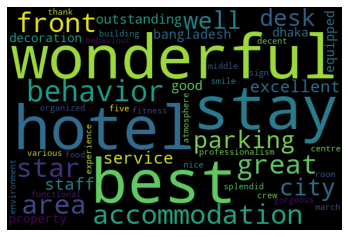

In [ ]:

# topic 0
draw_word_cloud(0)


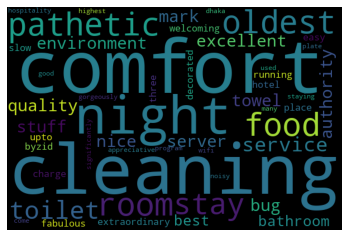

In [ ]:

# topic 1
draw_word_cloud(1)  # ...


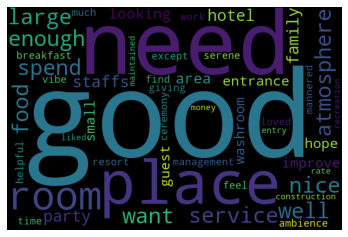

In [ ]:

draw_word_cloud(2)


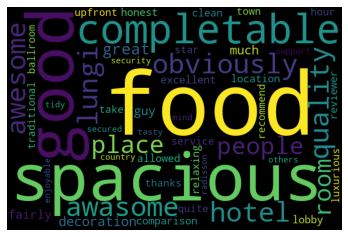

In [ ]:

draw_word_cloud(3)


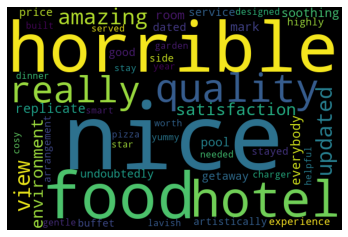

In [ ]:

draw_word_cloud(4)


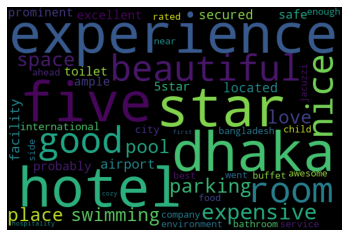

In [ ]:

draw_word_cloud(5)


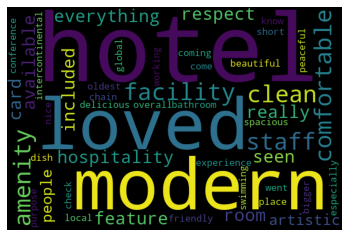

In [ ]:

draw_word_cloud(6)


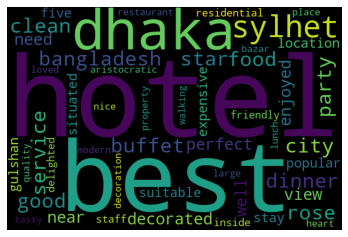

In [ ]:

draw_word_cloud(7)


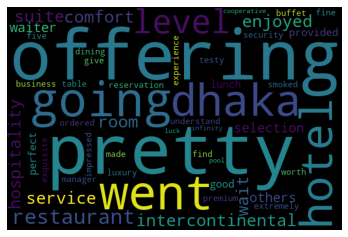

In [ ]:

draw_word_cloud(8)


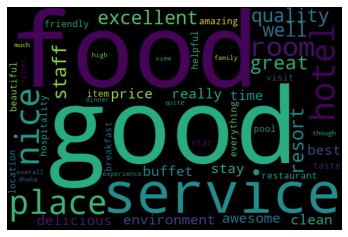

In [ ]:

draw_word_cloud(9)
